<a href="https://colab.research.google.com/github/Deivst/multivarible_regresion/blob/main/regresion_multivarible_Facebook_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos los datos desde https://archive.ics.uci.edu/

Creamos nuestro Dataframe (df)

In [88]:
import pandas as pd
df = pd.read_csv("dataset_Facebook.csv", sep=";")
df.cols = ["Page total likes",
    "Type",
    "Category",
    "Post Month",
    "Post Weekday",
    "Post Hour",
    "Paid",
    "Lifetime Post Total Reach",
    "Lifetime Post Total Impressions",
    "Lifetime Engaged Users",
    "Lifetime Post Consumers",
    "Lifetime Post Consumptions",
    "Lifetime Post Impressions by people who have liked your Page and engaged with your post",
    "Lifetime Post reach by people who like your Page",
    "Lifetime People who have liked your Page and engaged with your post",
    "comment",
    "like",
    "Total Interactions"]
df = pd.get_dummies(df, columns=["Type", "Category"], drop_first=True)
df.head()

<ipython-input-88-97f254a8cea3>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cols = ["Page total likes",


,Page total likes,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,...,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type_Photo,Type_Status,Type_Video,Category_2,Category_3
0,139441,12,4,3,0.0,2752,5091,178,109,159,...,119,4,79.0,17.0,100,True,False,False,True,False
1,139441,12,3,10,0.0,10460,19057,1457,1361,1674,...,1108,5,130.0,29.0,164,False,True,False,True,False
2,139441,12,3,3,0.0,2413,4373,177,113,154,...,132,0,66.0,14.0,80,True,False,False,False,True
3,139441,12,2,10,1.0,50128,87991,2211,790,1119,...,1386,58,1572.0,147.0,1777,True,False,False,True,False
4,139441,12,2,3,0.0,7244,13594,671,410,580,...,396,19,325.0,49.0,393,True,False,False,True,False


Creamos graficas de dispersion de los datos

   Page total likes  Post Month  Post Weekday  Post Hour  Paid  \
0            139441          12             4          3   0.0   
1            139441          12             3         10   0.0   
2            139441          12             3          3   0.0   
3            139441          12             2         10   1.0   
4            139441          12             2          3   0.0   

   Lifetime Post Total Reach  Lifetime Post Total Impressions  \
0                       2752                             5091   
1                      10460                            19057   
2                       2413                             4373   
3                      50128                            87991   
4                       7244                            13594   

   Lifetime Engaged Users  Lifetime Post Consumers  \
0                     178                      109   
1                    1457                     1361   
2                     177                      113

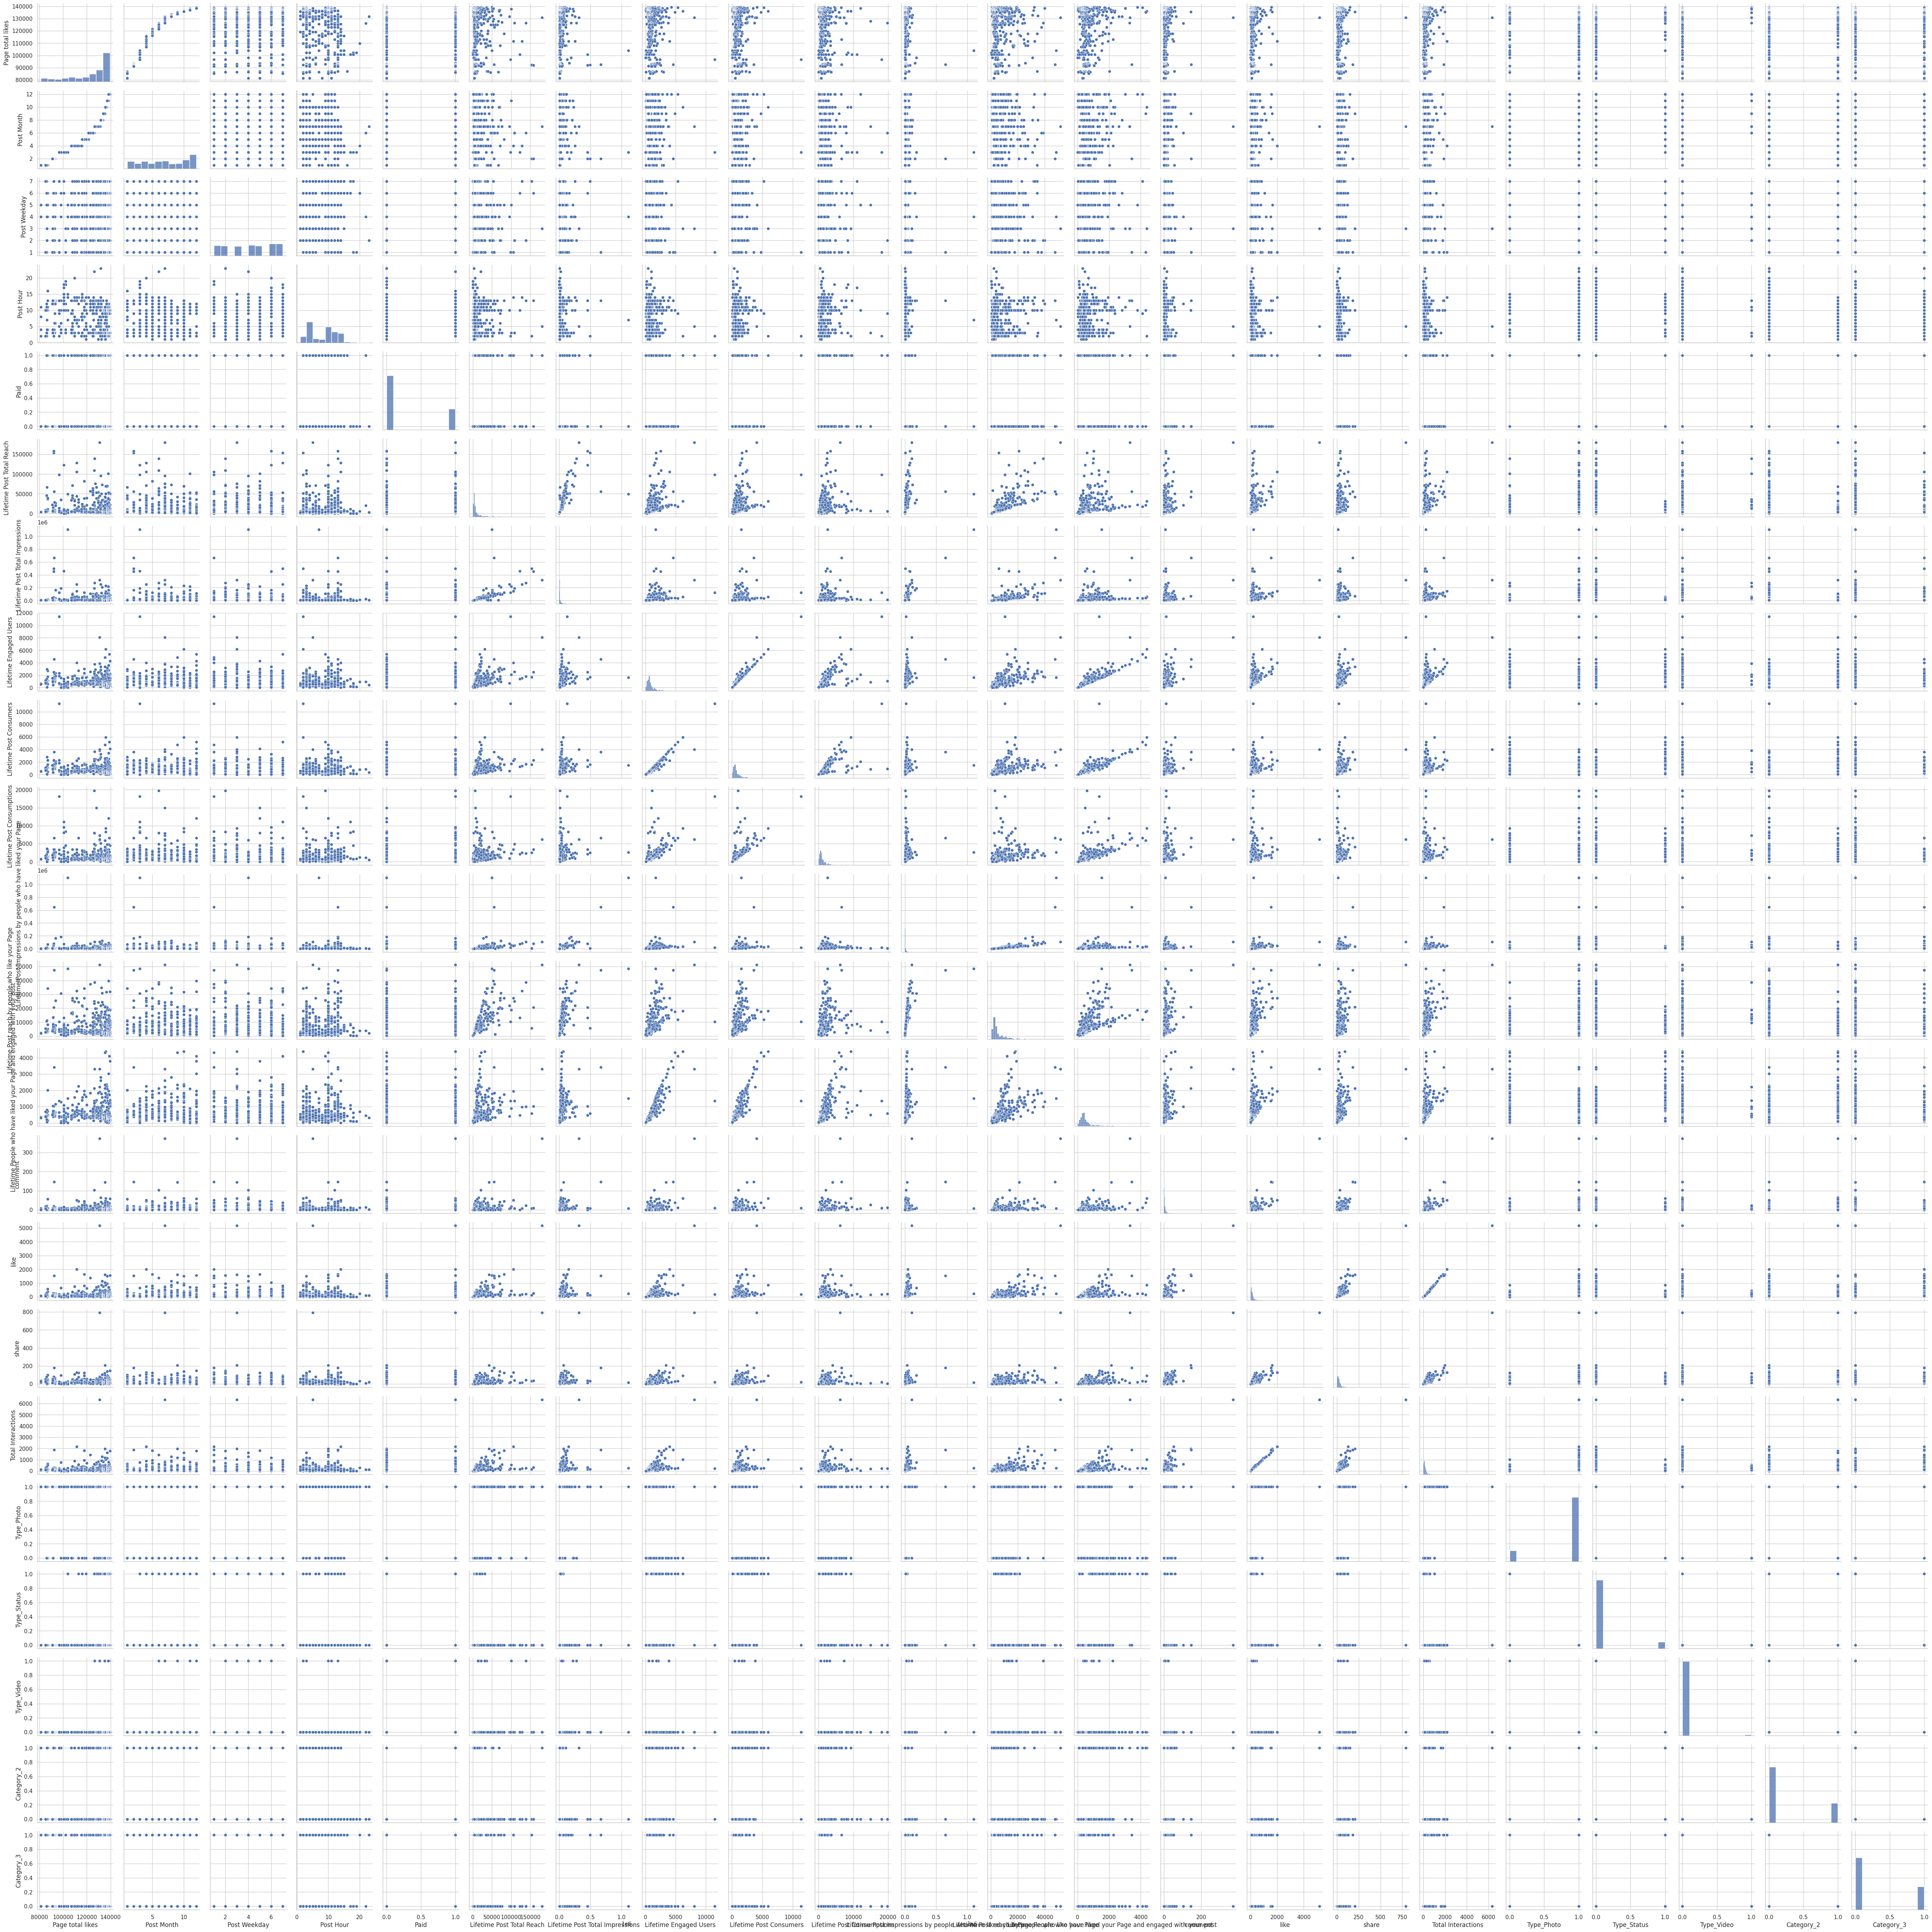

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = df.columns
print(df.head())
print(df.columns)
sns.pairplot(df[cols], height=2.5)
plt.show()

Creamos matriz de correlacion

<Axes: >

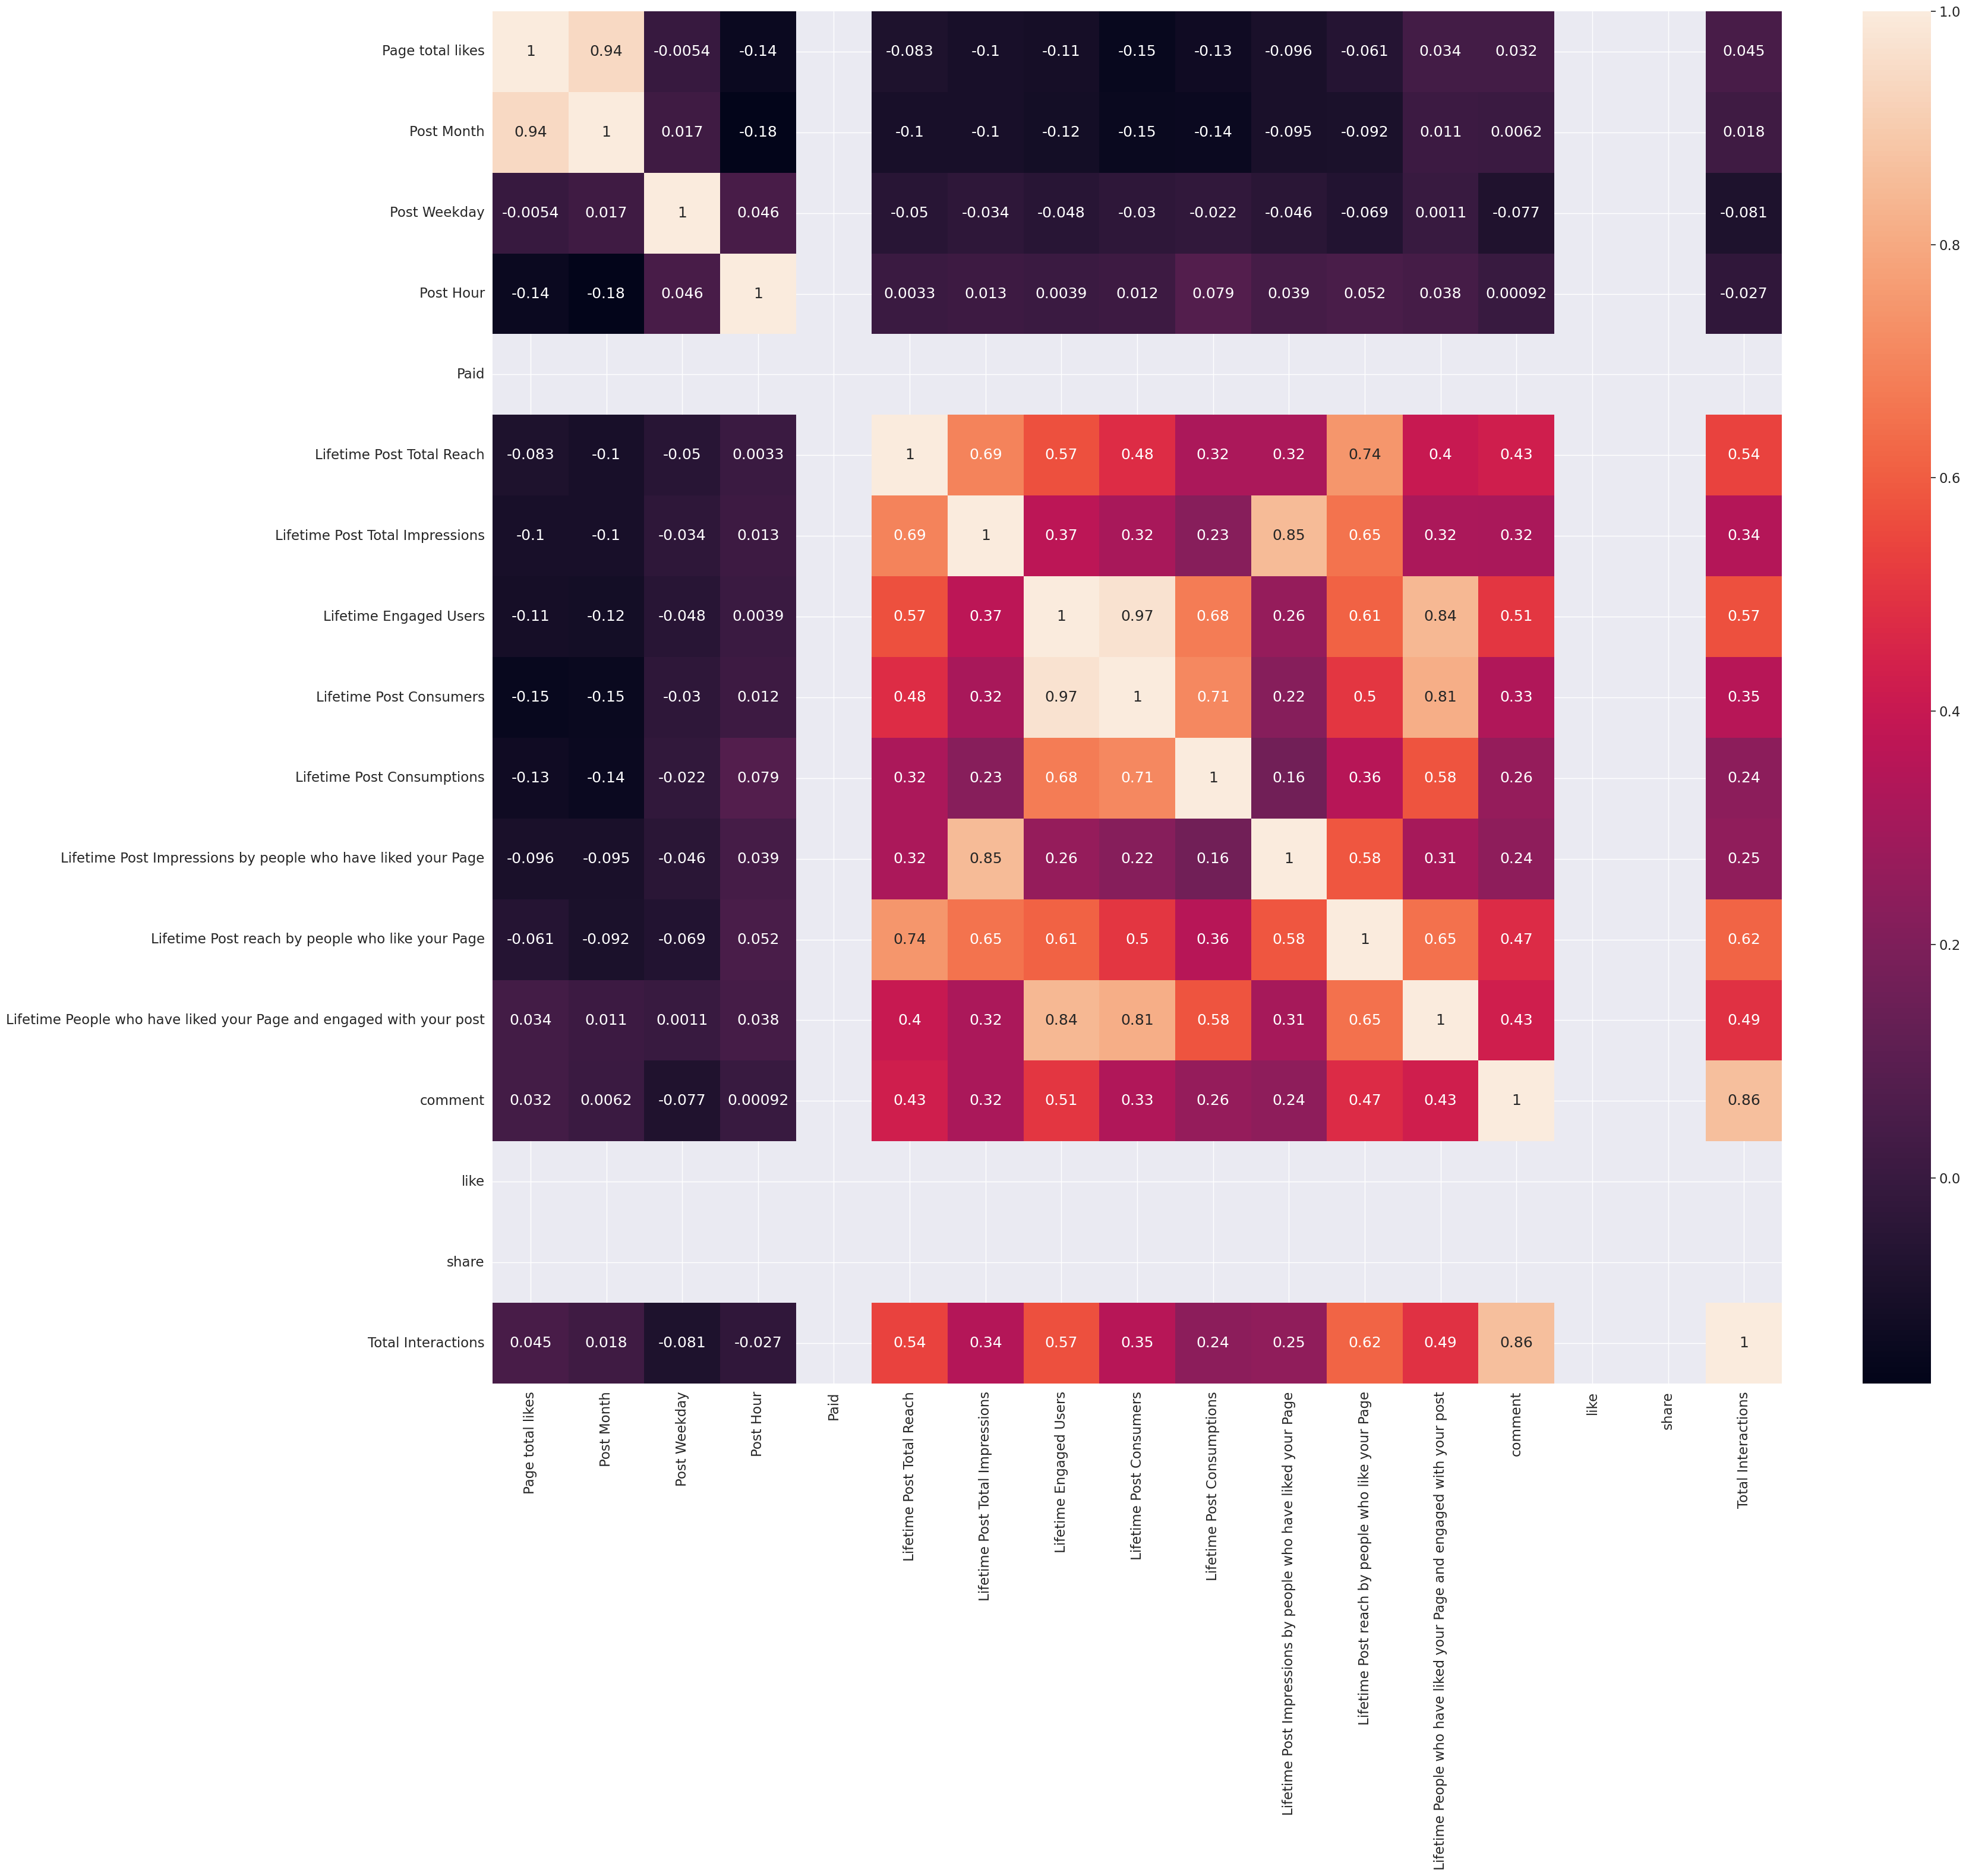

In [90]:
import numpy as np

# Filtrar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular la matriz de correlación
cm = np.corrcoef(df[numeric_cols].values.T)

# Crear el heatmap
plt.figure(figsize=(35, 30))# editor del tamaño de la grafica
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Verificamos si hay valores faltantes

In [105]:
import numpy as np
import pandas as pd

# Convertir self.exog a un DataFrame si no lo es
exog_df = pd.DataFrame(df)

# Identificar valores NaN
print("Valores NaN:")
print(exog_df.isna().sum())

# Identificar valores infinitos
print("Valores infinitos:")
print(np.isinf(exog_df).sum())

Valores NaN:
Page total likes                                                       0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page                       0
Lifetime People who have liked your Page and engaged with your post    0
comment                               

In [112]:
#ejecutar si hay valores faltantes
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # O 'median' o 'most_frequent'
df[['share']] = imputer.fit_transform(df[['share']])
#en este caso la unica con valores faltantes es la variable share

In [113]:
import statsmodels.api as sm


X_cols = list(set(cols)-set(["Total Interactions"]))
Y_cols = ["Total Interactions"]

X_indepent = df[X_cols].values
Y_depent = df[Y_cols].values

X_train, X_test, Y_train, Y_test = train_test_split(X_indepent,Y_depent)
sc_x = StandardScaler().fit(X_indepent)
sc_y = StandardScaler().fit(Y_depent)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

# Add a constant to the independent variables for the statsmodels OLS
X_train_sm = sm.add_constant(X_train)

# Crear un modelo OLS (Ordinary Least Squares)
ols_model = sm.OLS(Y_train, X_train_sm).fit()

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.stattools import durbin_watson, jarque_bera  # Corregido aquí
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad

# Resumen del modelo
print(ols_model.summary())

# Obtener p-valores
p_values = pd.Series(ols_model.pvalues, index=['const'] + X_cols)

# Filtrar variables significativas (p-valor <= 0.05)
significant_features = p_values[p_values <= 0.05].index
print("\nVariables significativas:", significant_features)

# Calcular VIF para detectar multicolinealidad
vif_data = pd.DataFrame()
vif_data["Feature"] = X_cols  # Use X_cols which holds the original feature names
vif_data["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]

print("\nVIF:")
print(vif_data)

# Filtrar variables con VIF alto (> 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]
print("\nVariables con alto VIF:", high_vif_features)

# Detección de valores atípicos usando residuos estandarizados
influence = OLSInfluence(ols_model)
standardized_residuals = influence.resid_studentized_internal
outliers = np.where(np.abs(standardized_residuals) > 3)[0]
print("\nValores atípicos (índices):", outliers)

# Prueba de Jarque-Bera para normalidad de residuos
jb_test = jarque_bera(ols_model.resid)
print("\nPrueba de Jarque-Bera:")
print(f"Estadístico: {jb_test[0]}, p-valor: {jb_test[1]}")
if jb_test[1] < 0.05:
    print("Los residuos NO siguen una distribución normal.")
else:
    print("Los residuos siguen una distribución normal.")

# Prueba de Durbin-Watson para autocorrelación
dw_stat = durbin_watson(ols_model.resid)
print("\nPrueba de Durbin-Watson:")
print(f"Estadístico: {dw_stat}")
if dw_stat < 1.5 or dw_stat > 2.5:
    print("Hay evidencia de autocorrelación en los residuos.")
else:
    print("No hay evidencia de autocorrelación en los residuos.")

# Prueba de Breusch-Pagan para homocedasticidad
bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
print("\nPrueba de Breusch-Pagan:")
print(f"Estadístico: {bp_test[0]}, p-valor: {bp_test[1]}")
if bp_test[1] < 0.05:
    print("Los residuos NO tienen varianza constante (heterocedasticidad).")
else:
    print("Los residuos tienen varianza constante (homocedasticidad).")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.201e+04
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:39:02   Log-Likelihood:                 816.81
No. Observations:                 375   AIC:                            -1590.
Df Residuals:                     353   BIC:                            -1503.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.278      0.7

Conclusiones:

1. Bondad de ajuste del modelo
R-squared: 0.999
El R-cuadrado es extremadamente alto, lo que indica que el modelo explica casi toda la variabilidad en la variable dependiente Total Interactions. Esto sugiere que las variables independientes seleccionadas son muy relevantes para predecir Total Interactions.

Adj. R-squared: 0.999
El R-cuadrado ajustado también es muy alto, lo que confirma que incluso después de ajustar por el número de predictores, el modelo sigue explicando una gran proporción de la variabilidad.

2. Significancia global del modelo
F-statistic: 1.20e+04
El estadístico F es muy alto, lo que indica que al menos uno de los coeficientes de los predictores es significativamente diferente de cero.

Prob (F-statistic): 0.00
El valor p asociado al estadístico F es prácticamente cero, lo que confirma que el modelo es altamente significativo en su conjunto.

3. Coeficientes y significancia de los predictores
Variables significativas (p < 0.05)
x2: Coeficiente = 0.7857, p-value = 0.000
x6: Coeficiente = 0.0628, p-value = 0.000
x7: Coeficiente = 0.0082, p-value = 0.968
x8: Coeficiente = 0.2084, p-value = 0.000
x9: Coeficiente = 0.1180, p-value = 0.000
x15: Coeficiente = 0.0028, p-value = 0.254
x21: Coeficiente = -0.1807, p-value = 0.000
Estas variables tienen un impacto significativo en Total Interactions. Por ejemplo:

Un aumento unitario en x2 (que corresponde a "Lifetime Post Total Reach") aumenta Total Interactions en 0.7857 unidades.
Un aumento unitario en x9 (que corresponde a "Lifetime Post Consumers") aumenta Total Interactions en 0.1180 unidades.
Un aumento unitario en x21 (que corresponde a "Paid") disminuye Total Interactions en 0.1807 unidades.
Variables no significativas (p > 0.05)
x1: Coeficiente = -0.0024, p-value = 0.397
x3: Coeficiente = 0.0034, p-value = 0.084
x4: Coeficiente = 0.0010, p-value = 0.829
x5: Coeficiente = 0.0012, p-value = 0.420
x10: Coeficiente = -0.0015, p-value = 0.841
x11: Coeficiente = -0.0016, p-value = 0.829
x12: Coeficiente = 0.0013, p-value = 0.882
x13: Coeficiente = 0.0033, p-value = 0.992
x14: Coeficiente = 1.79e-05, p-value = 0.911
x16: Coeficiente = -0.0016, p-value = 0.817
x17: Coeficiente = -0.0032, p-value = 0.330
x18: Coeficiente = -8.236e-05, p-value = 0.958
x19: Coeficiente = -0.0028, p-value = 0.564
x20: Coeficiente = 0.0059, p-value = 0.166
Estas variables no tienen un impacto significativo en Total Interactions según este modelo.

4. Diagnósticos
Omnibus: 815.081, Prob(Omnibus): 0.000
Los valores altos de Omnibus y su probabilidad cercana a cero indican que los residuos no siguen una distribución normal. Esto puede afectar la validez de las pruebas de hipótesis basadas en la normalidad.

Skew: -15.878, Kurtosis: 285.865
La asimetría y la curtosis fuera del rango [-2, 2] indican desviaciones significativas de la normalidad en los residuos.

Durbin-Watson: 1.983
El valor cerca de 2 indica que no hay autocorrelación en los residuos, lo cual es deseable.

Jarque-Bera (JB): 1265951.950, Prob(JB): 0.000
Los valores altos de JB y su probabilidad cercana a cero confirman que los residuos no son normales.

Cond. No.: 106.5
El número de condición menor que 30 indica que no hay problemas graves de multicolinealidad entre los predictores.

Conclusiones finales
Modelo con alta bondad de ajuste: El modelo explica casi toda la variabilidad en Total Interactions, lo que indica que las variables independientes seleccionadas son muy relevantes.
Variables significativas: Las variables como "Lifetime Post Total Reach", "Lifetime Post Consumers", "Paid", etc., tienen un impacto significativo en Total Interactions.
Problemas de normalidad: Los diagnósticos indican problemas de normalidad en los residuos, lo que puede afectar la validez de las pruebas de hipótesis. Considera transformar los datos o usar un modelo más robusto.
Sin multicolinealidad: No hay problemas de multicolinealidad entre los predictores.
Respuesta final: El modelo de regresión lineal tiene una excelente bondad de ajuste y varias variables significativas, pero presenta problemas de normalidad en los residuos. Es importante considerar estas limitaciones antes de hacer inferencias o predicciones con el modelo.